# Predictive Maintenance EV Battery

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

## EDA (Exploratoty Data Analysis)

In [2]:
# Load the dataset
file_path = 'ai4i2020.csv'  
dF = pd.read_csv(file_path)

In [3]:
# Step 2: Explore the data
print(dF.head())
print(dF.describe())

   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0  

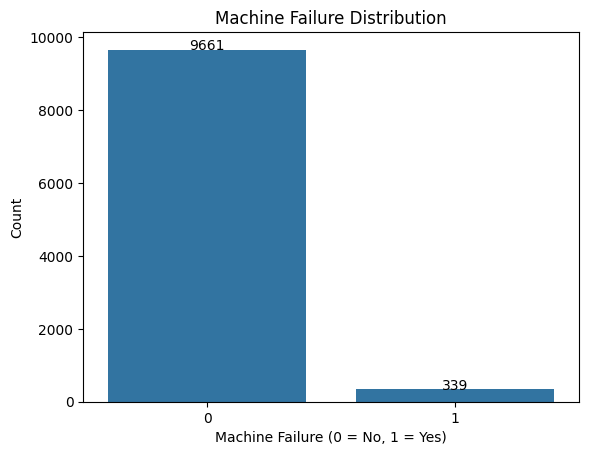

In [4]:
# Visualize the distribution of machine failures
sns.countplot(x='Machine failure', data=dF)
plt.title('Machine Failure Distribution')
plt.xlabel('Machine Failure (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)

# for the values
for p in plt.gca().patches:
    plt.gca().text(
        p.get_x() + p.get_width() / 2,  # x position
        p.get_height() + 1,             # y position (slightly above bar)
        int(p.get_height()),            # the value
        ha='center'                     # horizontal alignment
    )

plt.show()

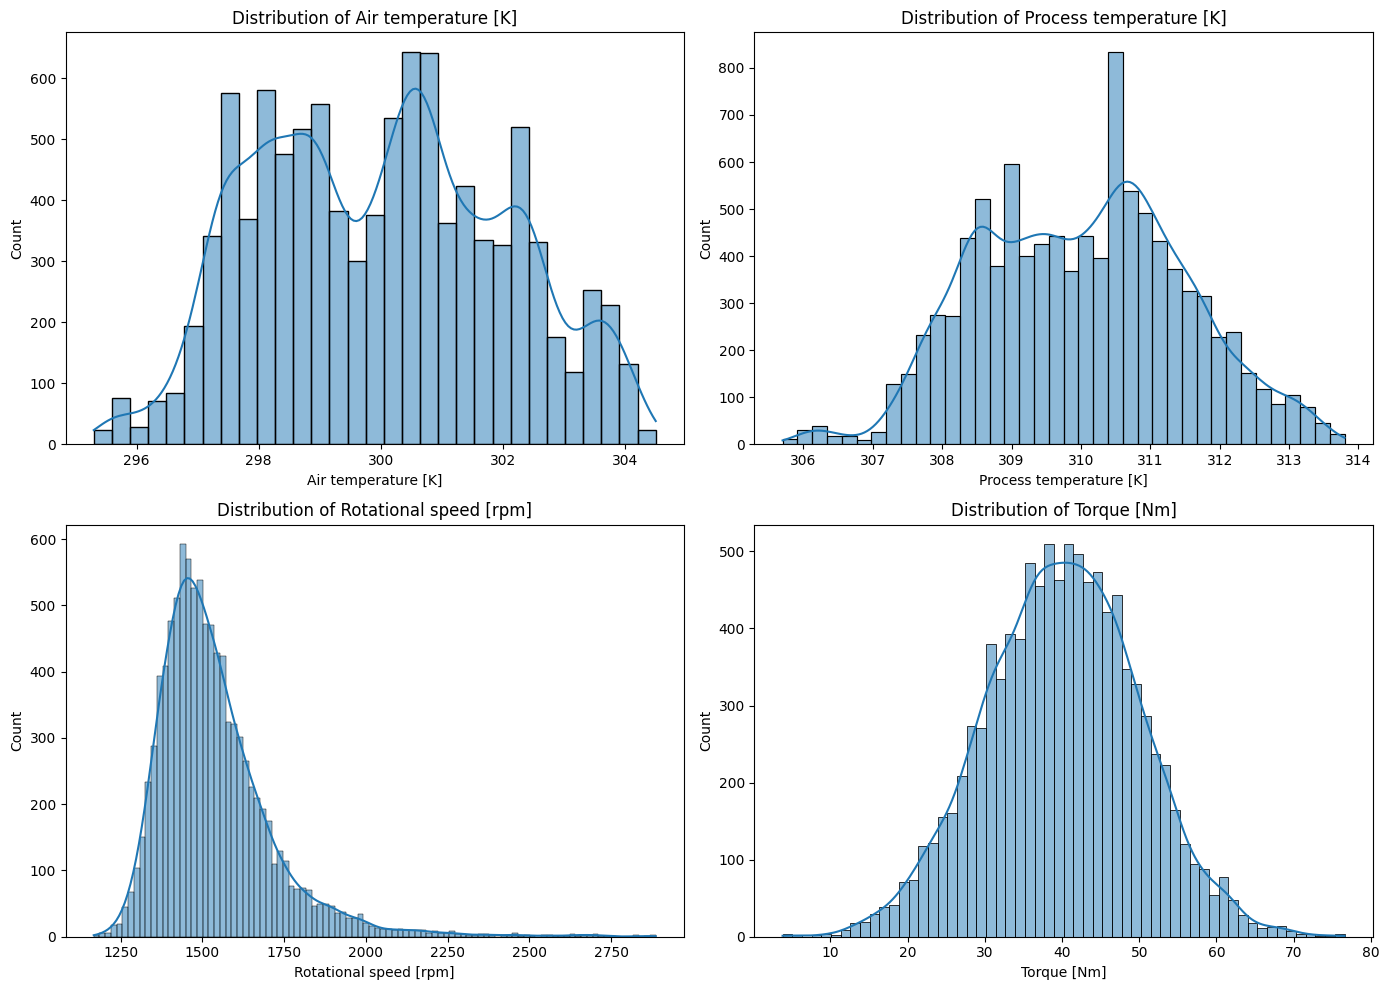

In [5]:
# Distributions of key features
features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]']

plt.figure(figsize=(14, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(dF[feature], kde=True)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

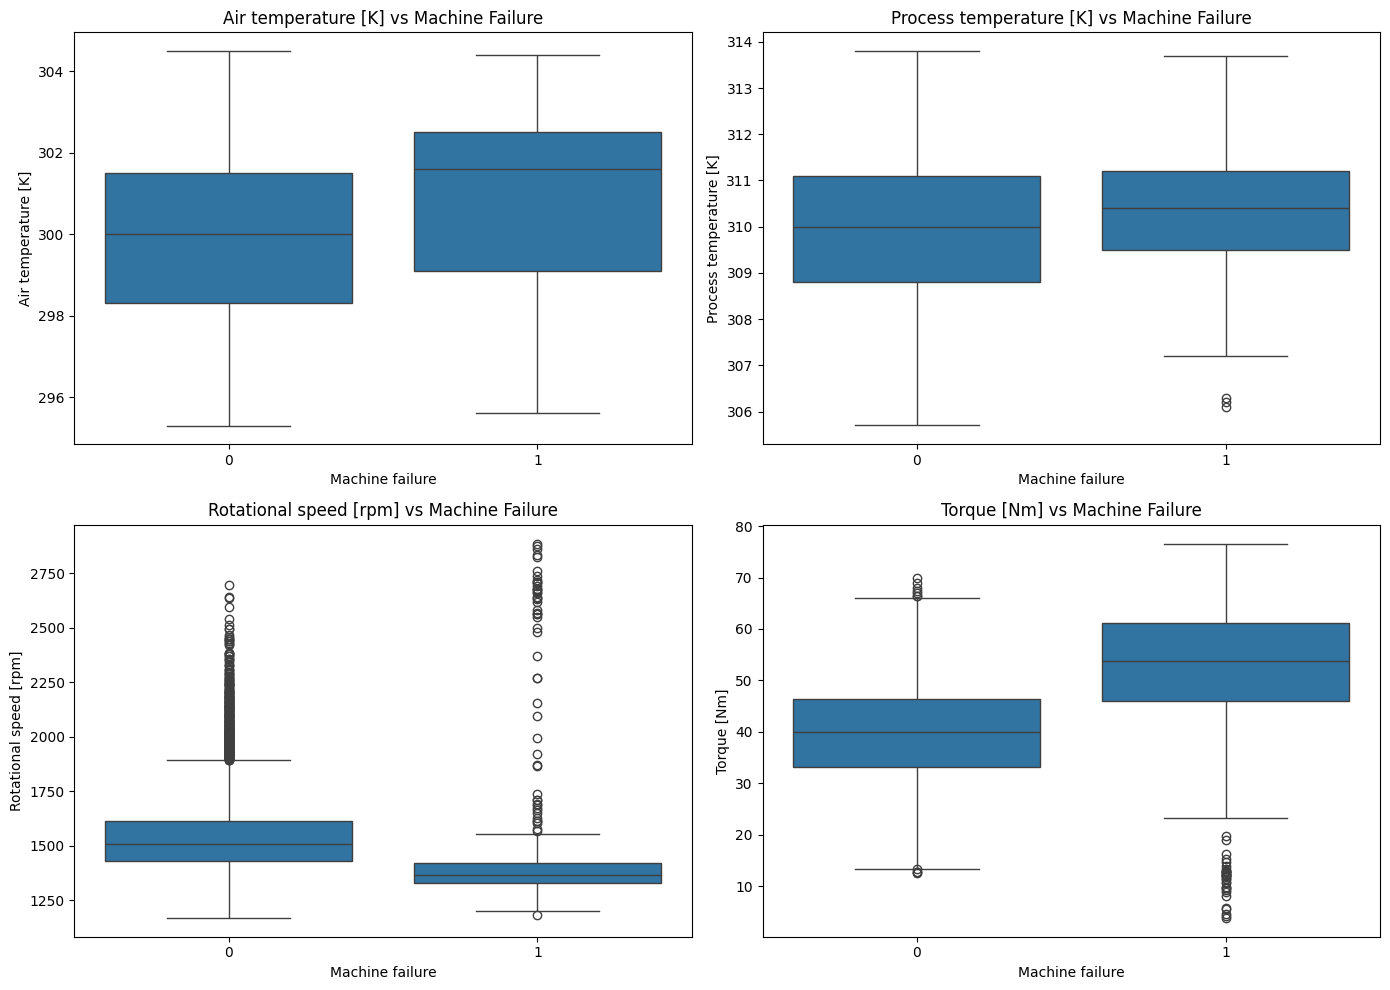

In [6]:
# Key features against Machine failure
plt.figure(figsize=(14, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Machine failure', y=feature, data=dF)
    plt.title(f'{feature} vs Machine Failure')

plt.tight_layout()
plt.show()

## *Q1. Can we develop a predictive model to estimate maintenance schedules?*

In [7]:
# Load the dataset
file_path = 'ai4i2020.csv'  
dF = pd.read_csv(file_path)

In [8]:
# Step 2: Explore the data
print(dF.head())
print(dF.describe())

   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0  

In [9]:
df = dF.drop(['Product ID'], axis=1)

In [10]:
columns_to_drop = ['UDI', 'Type']
X = df.drop(columns=columns_to_drop)

In [11]:
y = df['Machine failure']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)

In [13]:
# Step 6: Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=32)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=32)

In [15]:
y_pred = rf_model.predict(X_test_scaled)

In [16]:
df1 = dF.copy()

# Insert predictions into the `predicted failure` column for the corresponding test rows
df1.loc[X_test.index, 'predicted failure'] = y_pred

# Step 2: Save the updated DataFrame to a new CSV or Excel file
output_file_path = 'updated_ai4i2020_predictions.csv'  # Change this to your desired output file path
df1.to_csv(output_file_path, index=False)

# Optionally, print the first few rows to verify the added column
print(df1.head())

   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  predicted failure  
0    0    0    0    0                

In [17]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2905
           1       1.00      1.00      1.00        95

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000

Confusion Matrix:
 [[2905    0]
 [   0   95]]


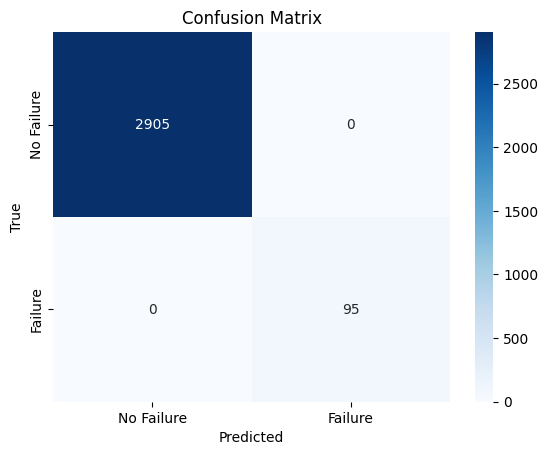

In [18]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Failure', 'Failure'], yticklabels=['No Failure', 'Failure'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [19]:
required_columns = ['Machine failure', 'predicted failure', 'UDI', 'Product ID', 
                    'Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']
missing_columns = [col for col in required_columns if col not in df1.columns]
if missing_columns:
    raise ValueError(f"Missing required columns: {missing_columns}")

In [20]:
df1 = df1.fillna(0)

In [21]:
df1.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,predicted failure
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,0.0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,0.0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,0.0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,0.0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,0.0


In [22]:
filtered_df1 = df1[(df1['Machine failure'] == 1) & (df1['predicted failure'] == 1)]

In [23]:
result_df1 = filtered_df1[['UDI', 'Product ID', 'Air temperature [K]','Process temperature [K]','Rotational speed [rpm]',
                           'Torque [Nm]','Tool wear [min]']] 

In [24]:
print(result_df1)

       UDI Product ID  Air temperature [K]  Process temperature [K]  \
77      78     L47257                298.8                    308.9   
160    161     L47340                298.4                    308.2   
194    195     M15054                298.2                    308.5   
242    243     L47422                298.0                    308.2   
442    443     L47622                297.4                    308.5   
...    ...        ...                  ...                      ...   
8926  8927     M23786                297.3                    308.3   
9015  9016     L56195                297.2                    308.1   
9175  9176     L56355                297.8                    309.0   
9653  9654     L56833                299.0                    309.9   
9654  9655     L56834                299.1                    310.0   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  
77                      1455         41.3              208  
160                     1

## *Q2. How does the operating environment (temperature, humidity, etc.) affect machine performance?*

In [25]:
columns_to_analyze = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 
                      'Torque [Nm]', 'Tool wear [min]', 'Machine failure']
dF_subset = dF[columns_to_analyze]

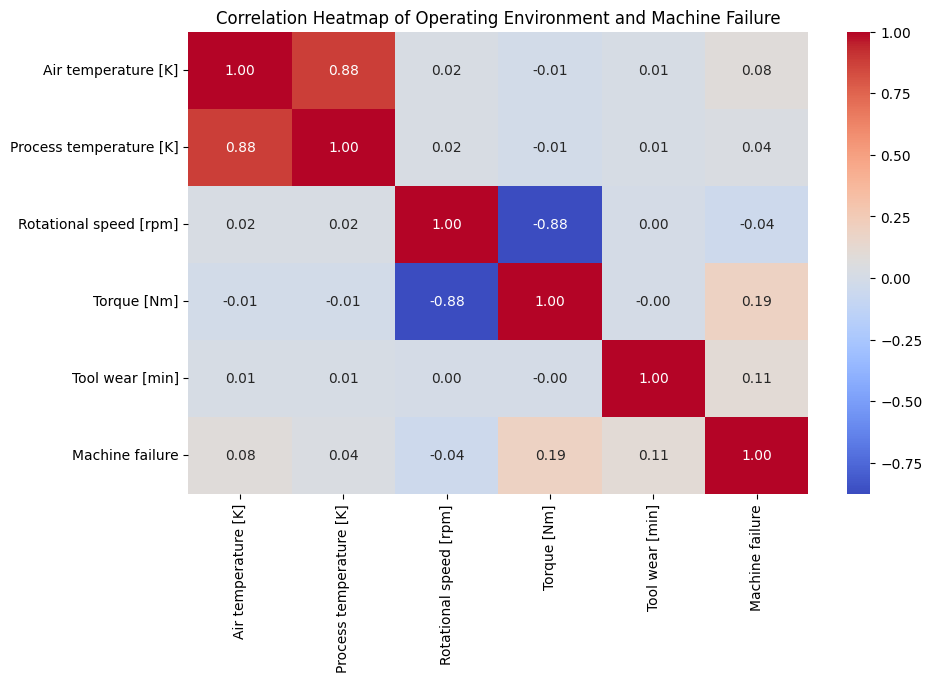

In [26]:
plt.figure(figsize=(10, 6))
sns.heatmap(dF_subset.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Operating Environment and Machine Failure')
plt.show()

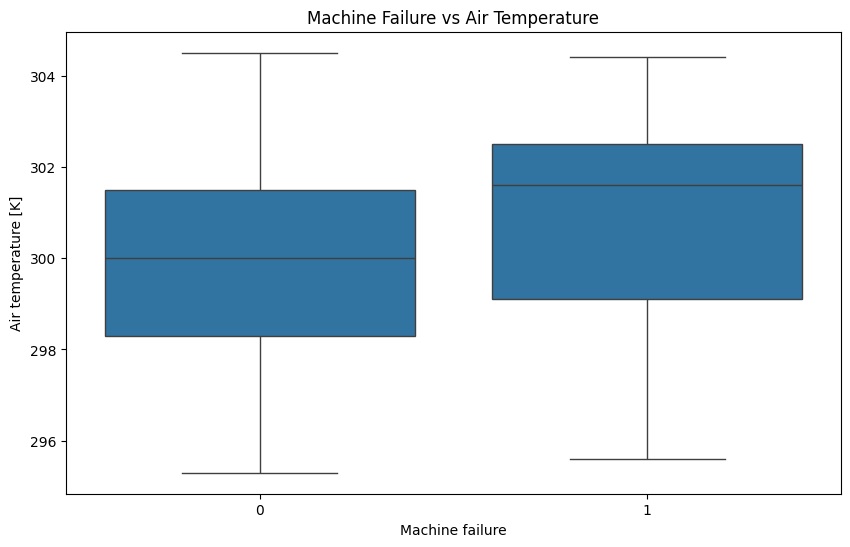

In [27]:
# Boxplot to analyze temperature vs machine failure
plt.figure(figsize=(10, 6))
sns.boxplot(x='Machine failure', y='Air temperature [K]', data=dF_subset)
plt.title('Machine Failure vs Air Temperature')
plt.show()

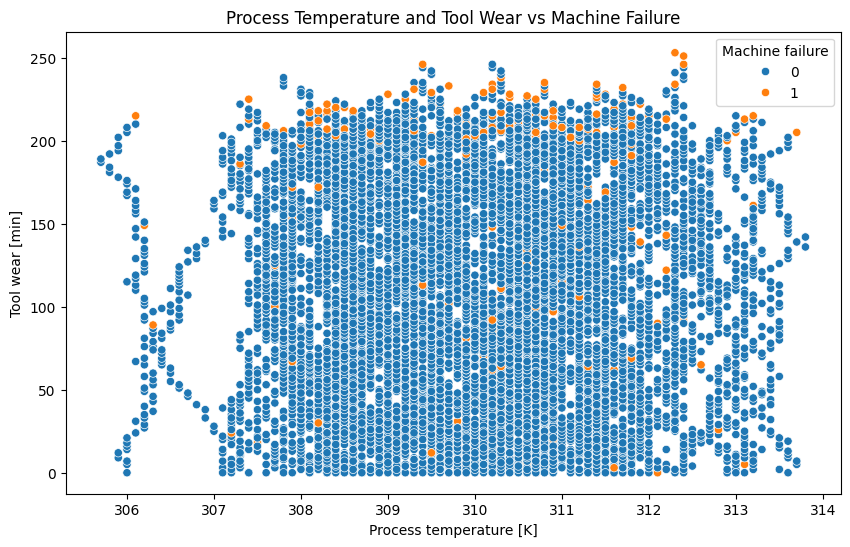

In [28]:
# Scatter plot for Process Temp and Machine Failure
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Process temperature [K]', y='Tool wear [min]', hue='Machine failure', data=dF_subset)
plt.title('Process Temperature and Tool Wear vs Machine Failure')
plt.show()

In [29]:
X = df[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 
        'Torque [Nm]', 'Tool wear [min]']]
y = df['Machine failure']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [32]:
y_pred = rf_model.predict(X_test)

In [33]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[1931    8]
 [  25   36]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1939
           1       0.82      0.59      0.69        61

    accuracy                           0.98      2000
   macro avg       0.90      0.79      0.84      2000
weighted avg       0.98      0.98      0.98      2000



In [34]:
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

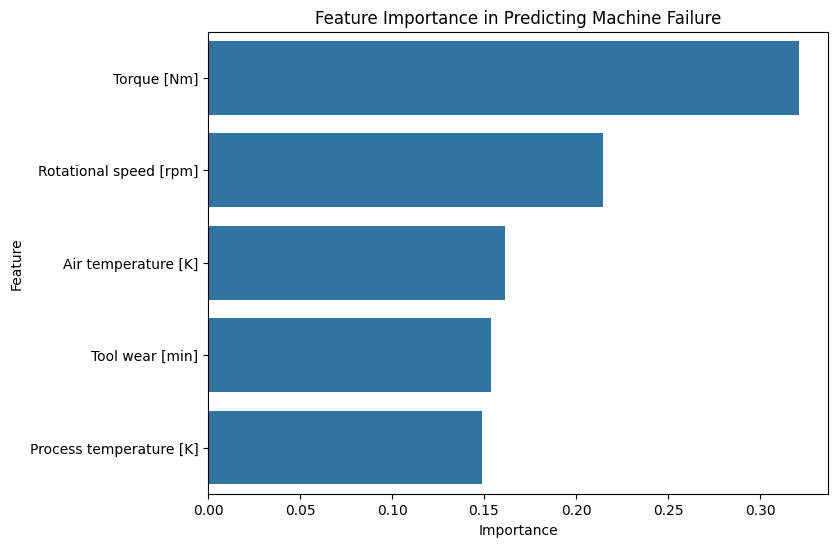

In [35]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance in Predicting Machine Failure')
plt.show()

## *Q3. How can we optimize the tool wear rate to reduce failures?*

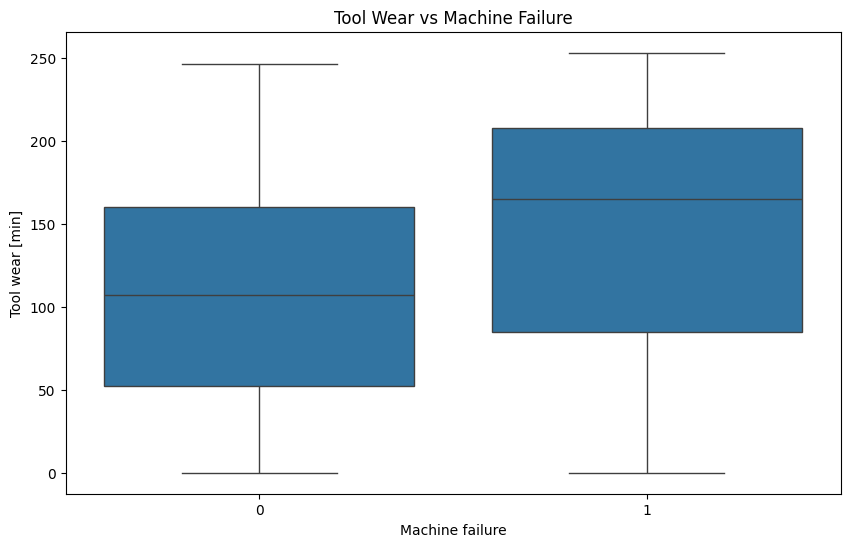

In [36]:
# Visualize tool wear vs machine failure
plt.figure(figsize=(10, 6))
sns.boxplot(x='Machine failure', y='Tool wear [min]', data=dF_subset)
plt.title('Tool Wear vs Machine Failure')
plt.show()

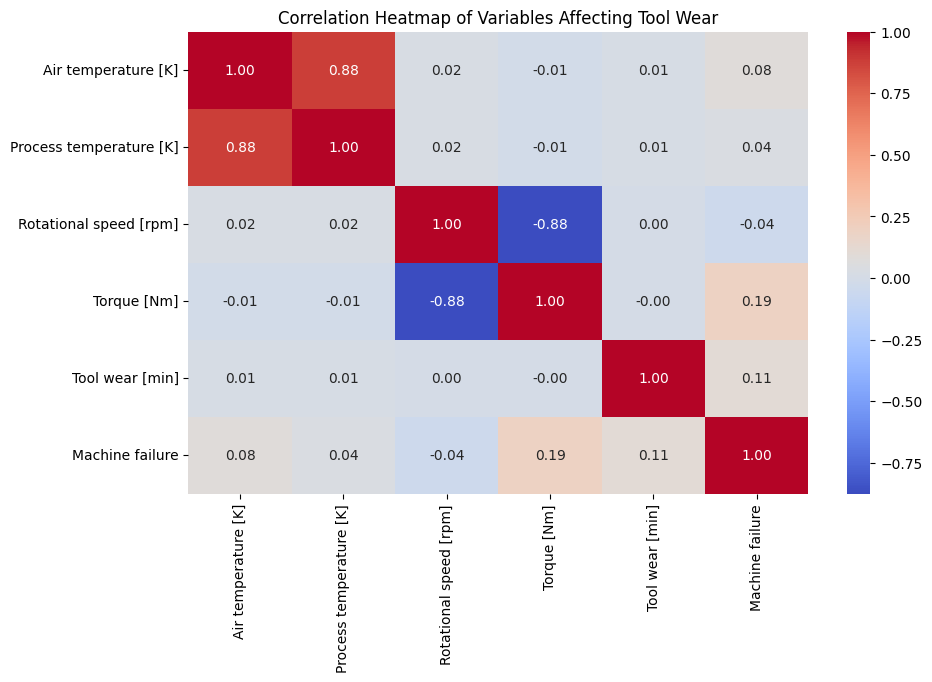

In [37]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(dF_subset.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Variables Affecting Tool Wear')
plt.show()

In [38]:
# Prepare data
X1 = df[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]']]  # Features
y1 = df['Tool wear [min]']  # Target variable

In [39]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [40]:
# Train a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X1_train, y1_train)

RandomForestRegressor(random_state=42)

In [41]:
# Predict tool wear
y1_pred = rf_regressor.predict(X1_test)

In [42]:
# Evaluate the model
mse = mean_squared_error(y1_test, y1_pred)
r2 = r2_score(y1_test, y1_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 4045.149801679167
R^2 Score: 0.05250692659030709


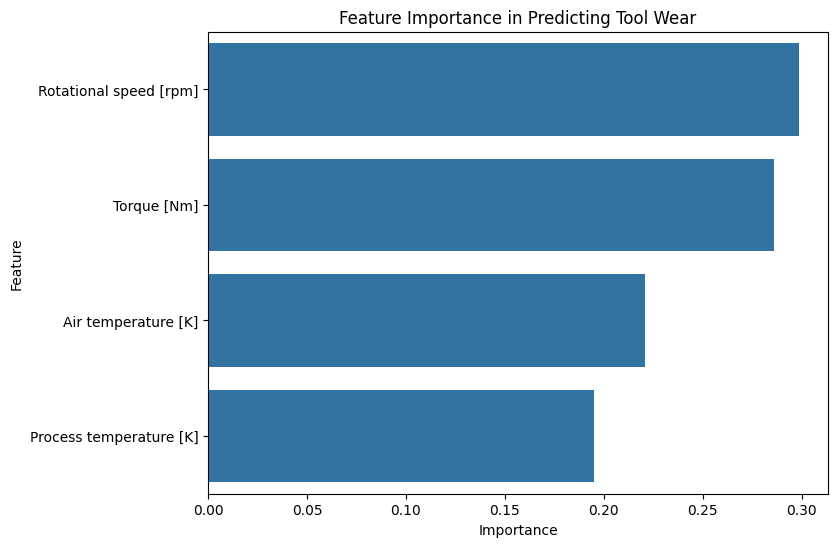

In [43]:
# Feature importance
feature_importances = pd.DataFrame({
    'Feature': X1.columns,
    'Importance': rf_regressor.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance in Predicting Tool Wear')
plt.show()

In [44]:
# Simulate operating conditions
simulation_data = pd.DataFrame({
    'Air temperature [K]': np.linspace(X['Air temperature [K]'].min(), X['Air temperature [K]'].max(), 100),
    'Process temperature [K]': np.linspace(X['Process temperature [K]'].min(), X['Process temperature [K]'].max(), 100),
    'Rotational speed [rpm]': np.linspace(X['Rotational speed [rpm]'].min(), X['Rotational speed [rpm]'].max(), 100),
    'Torque [Nm]': np.linspace(X['Torque [Nm]'].min(), X['Torque [Nm]'].max(), 100),
})

In [45]:
# Predict tool wear for simulated conditions
simulated_wear = rf_regressor.predict(simulation_data)

In [46]:
# Add predictions to the simulation data
simulation_data['Predicted Tool Wear'] = simulated_wear

In [47]:
# Find optimal conditions
optimal_conditions = simulation_data.loc[simulation_data['Predicted Tool Wear'].idxmin()]
print("Optimal Operating Conditions to Minimize Tool Wear:")
print(optimal_conditions)

Optimal Operating Conditions to Minimize Tool Wear:
Air temperature [K]         297.809091
Process temperature [K]     307.909091
Rotational speed [rpm]     1636.545455
Torque [Nm]                  23.654545
Predicted Tool Wear          60.500000
Name: 27, dtype: float64
